In [1]:
# import json
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
# import shap

# model = ResNet50(weights='imagenet')

# X, y = shap.datasets.imagenet50()

# def f(x):
#     tmp = x.copy()
#     preprocess_input(tmp)
#     return model(tmp)

# masker = shap.maskers.Image("inpaint_telea", X[0].shape)

# url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
# with open(shap.datasets.cache(url)) as file:
#     class_names = [v[1] for v in json.load(file).values()]
    

# explainer = shap.Explainer(f, masker, output_names=class_names)

# shap_values = explainer(X[1:3], max_evals=100, batch_size=50, outputs=shap.Explanation.argsort.flip[:4]) 


# shap.image_plot(shap_values)


# masker_blur = shap.maskers.Image("blur(128,128)", X[0].shape)

# explainer_blur = shap.Explainer(f, masker_blur, output_names=class_names)

# shap_values_fine = explainer_blur(X[1:3], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:4]) 

# shap.image_plot(shap_values_fine)



# shap.image_plot(shap_values_fine)

In [33]:
# import os

# # 设置要检查的目录路径
# directory = "/root/Breast Cancer/SHAPTEST"

# # 获取包括隐藏文件在内的所有文件和目录的列表
# all_items = os.listdir(directory)

# # 包括隐藏文件，隐藏文件在Unix系统中以点"."开头
# all_files_and_dirs_including_hidden = [f for f in all_items if os.path.isfile(os.path.join(directory, f)) or f.startswith('.')]

# print(all_files_and_dirs_including_hidden)

['.ipynb_checkpoints']


In [34]:
# import shutil
# import os

# # 设置要删除的文件夹路径，您需要根据您的实际路径进行替换
# directory = "/root/Breast Cancer/SHAPTEST"

# # 检查.ipynb_checkpoints文件夹是否存在
# checkpoints_path = os.path.join(directory, '.ipynb_checkpoints')
# if os.path.exists(checkpoints_path) and os.path.isdir(checkpoints_path):
#     # 使用shutil.rmtree删除.ipynb_checkpoints文件夹及其所有内容
#     shutil.rmtree(checkpoints_path)
#     print(f"Successfully removed folder: {checkpoints_path}")
# else:
#     print(f"No .ipynb_checkpoints folder found at {directory}")

Successfully removed folder: /root/Breast Cancer/SHAPTEST/.ipynb_checkpoints


In [1]:
from tensorflow.keras.models import load_model
import tensorflow_addons as tfa
import shap
import numpy as np

# 加载模型，确保添加了自定义对象的引用
model = load_model('/root/Breast Cancer/Model Code/ModelFileH5/Version8-DIR.h5')


2024-03-12 01:02:27.972714: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-12 01:02:32.819317: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-12 01:02:33.425033: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22134 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:b1:00.0, compute capability: 8.9


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
input_shape = (224, 224, 3)

test_dir = '/root/Breast Cancer/SHAPTEST'

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='categorical',
    shuffle = False
)

Found 10 images belonging to 2 classes.


In [3]:
def f(data):
    predictions = model.predict(data)
    return predictions

In [4]:
class_names = list(test_generator.class_indices.keys())

In [5]:
# 创建一个基于图像masker的解释器，使用inpaint方法来处理图像部分的遮挡
masker = shap.maskers.Image("inpaint_telea", input_shape)

# 使用我们定义的预测函数和masker来创建SHAP解释器
explainer = shap.Explainer(f, masker, output_names=class_names)

2024-03-12 01:02:42.698895: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101
2024-03-12 01:02:43.736689: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-03-12 01:02:43.736712: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2024-03-12 01:02:43.736771: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 4s 4s/step


2024-03-12 01:02:44.702125: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1/1 [==============================] - 0s 52ms/step


  0%|          | 0/498 [00:00<?, ?it/s]

1/1 [==============================] - 0s 41ms/step


PartitionExplainer explainer:  20%|██        | 1/5 [00:00<?, ?it/s]

1/1 [==============================] - 0s 56ms/step


  0%|          | 0/498 [00:00<?, ?it/s]

1/1 [==============================] - 0s 40ms/step


PartitionExplainer explainer:  60%|██████    | 3/5 [00:35<00:17,  8.71s/it]

1/1 [==============================] - 0s 39ms/step


  0%|          | 0/498 [00:00<?, ?it/s]

1/1 [==============================] - 0s 34ms/step


PartitionExplainer explainer:  80%|████████  | 4/5 [00:51<00:11, 11.55s/it]

1/1 [==============================] - 0s 37ms/step


  0%|          | 0/498 [00:00<?, ?it/s]

1/1 [==============================] - 0s 36ms/step


PartitionExplainer explainer: 100%|██████████| 5/5 [01:15<00:00, 16.24s/it]

1/1 [==============================] - 0s 41ms/step


  0%|          | 0/498 [00:00<?, ?it/s]

1/1 [==============================] - 0s 50ms/step


PartitionExplainer explainer: 6it [01:42, 20.60s/it]                       


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

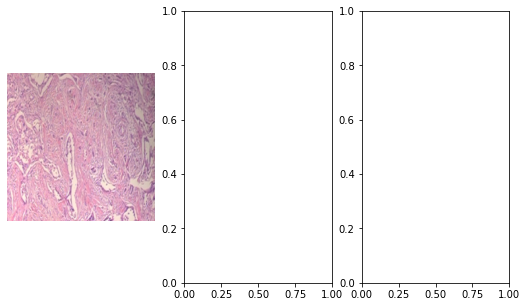

In [6]:
# 获取一批图像和标签
test_images, test_labels = next(test_generator)

# 计算这批图像的SHAP值
shap_values = explainer(test_images[5:10], outputs=shap.Explanation.argsort.flip[:2]) # 取这批图像中的第一张作为示例


# shap_values = explainer(X[1:3], max_evals=100, batch_size=50, outputs=shap.Explanation.argsort.flip[:4]) 


# 可视化第一张图像的SHAP值
shap.plots.image(shap_values[0])

In [ ]:
# print(class_names[1])

In [ ]:
for i in range(len(shap_values)):
    shap.plots.image(shap_values[i])

In [58]:
print(len(shap_values))


3


1/1 [==============================] - 0s 56ms/step
Predicted class: malignant - Probabilities: benign=0.008020077832043171, malignant=0.9919799566268921
